<a href="https://colab.research.google.com/github/basel5621/final-depi-project/blob/main/trained_GRU_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting up the environment

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers, models,regularizers, callbacks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense ,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization, Bidirectional, LSTM, GRU, GlobalMaxPool1D
from tensorflow.keras.metrics import Recall, Precision
from tensorflow.keras.regularizers import l2

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Loading dataset

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1v27NO9YEz4AXY_rGskbtIqPsgIY_CRTo' -O train1.csv

--2024-10-11 12:57:25--  https://docs.google.com/uc?export=download&id=1v27NO9YEz4AXY_rGskbtIqPsgIY_CRTo
Resolving docs.google.com (docs.google.com)... 142.250.99.113, 142.250.99.101, 142.250.99.100, ...
Connecting to docs.google.com (docs.google.com)|142.250.99.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1v27NO9YEz4AXY_rGskbtIqPsgIY_CRTo&export=download [following]
--2024-10-11 12:57:25--  https://drive.usercontent.google.com/download?id=1v27NO9YEz4AXY_rGskbtIqPsgIY_CRTo&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.99.132, 2607:f8b0:400e:c09::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.99.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39529308 (38M) [application/octet-stream]
Saving to: ‘train1.csv’

train1.csv          100%[===================>]  37.70M   189MB/s    in 0.

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1QpvtoxF85kPr95Vg6XDbSguql6dXEjJS' -O train2.csv

--2024-10-11 12:56:07--  https://docs.google.com/uc?export=download&id=1v27NO9YEz4AXY_rGskbtIqPsgIY_CRTo
Resolving docs.google.com (docs.google.com)... 74.125.195.102, 74.125.195.101, 74.125.195.100, ...
Connecting to docs.google.com (docs.google.com)|74.125.195.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1v27NO9YEz4AXY_rGskbtIqPsgIY_CRTo&export=download [following]
--2024-10-11 12:56:07--  https://drive.usercontent.google.com/download?id=1v27NO9YEz4AXY_rGskbtIqPsgIY_CRTo&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.195.132, 2607:f8b0:400e:c05::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.195.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2420 (2.4K) [text/html]
Saving to: ‘train1.csv’

train1.csv          100%[===================>]   2.36K  --.-KB/s    in 0s      

2024-10-11

In [ ]:
df1 = pd.read_csv('train1.csv')
df2 = pd.read_csv('train2.csv')

In [ ]:
df1.head()

,cleaned_text,label
0,already tested blood 1947 long game ethnic cle...,1.0
1,yep thats hate bad,0.0
2,dream,1.0
3,uk first past post electoral system broken lea...,0.0
4,excited welcome one newest member team michell...,1.0


In [ ]:
df2.head()

,cleaned_text,label
0,going another signing north cause live blackpo...,0
1,cowardly loser seek racism weapon not win,1
2,checking much talked twitter thanks jen,1
3,feel hot im kind getty coughy scratchy throat,0
4,yay emily twitter exciting hope summer going w...,1


# Preprocessing data for analysis

In [ ]:
# Rename columns if needed
df1 = df1.rename(columns={'cleaned_text': 'text'})
df2 = df2.rename(columns={'cleaned_text': 'text'})

df1.shape, df2.shape

((441353, 2), (1440000, 2))

## combine the Two dataset

In [ ]:
# Concatenate the datasets
combined_df = pd.concat([df1[['text', 'label']], df2[['text', 'label']]], ignore_index=True)
combined_df.head()

,text,label
0,already tested blood 1947 long game ethnic cle...,1.0
1,yep thats hate bad,0.0
2,dream,1.0
3,uk first past post electoral system broken lea...,0.0
4,excited welcome one newest member team michell...,1.0


In [ ]:
combined_df.isna().sum()

,0
text,5846
label,0


In [ ]:
combined_df=combined_df.dropna()

In [ ]:
combined_df.isna().sum()

,0
text,0
label,0


In [ ]:
combined_df.shape

(1875507, 2)

## Describing word count statistics

In [ ]:
combined_df['wordcount'] =combined_df['text'].astype(str).apply(lambda x: len(x.split()))
combined_df.head()

,text,label,wordcount
0,already tested blood 1947 long game ethnic cle...,1.0,17
1,yep thats hate bad,0.0,4
2,dream,1.0,1
3,uk first past post electoral system broken lea...,0.0,24
4,excited welcome one newest member team michell...,1.0,19


[(4, 161643), (5, 161537), (6, 154672), (3, 151295), (7, 142645), (8, 129151), (2, 120158), (9, 118527), (10, 108370), (11, 99306), (12, 88069), (13, 75218), (14, 60765), (1, 49973), (15, 46273), (16, 34017), (17, 24771), (18, 18724), (19, 15350), (20, 13545), (21, 12958), (22, 12526), (23, 12411), (24, 12177), (25, 11321), (26, 9936), (27, 8491), (28, 6913), (29, 4803), (30, 3482), (31, 2385), (32, 1603), (33, 933), (34, 597), (35, 358), (36, 212), (37, 118), (38, 96), (40, 55), (39, 38), (41, 23), (42, 21), (43, 10), (44, 10), (47, 7), (46, 4), (45, 3), (49, 3), (53, 1), (64, 1)]


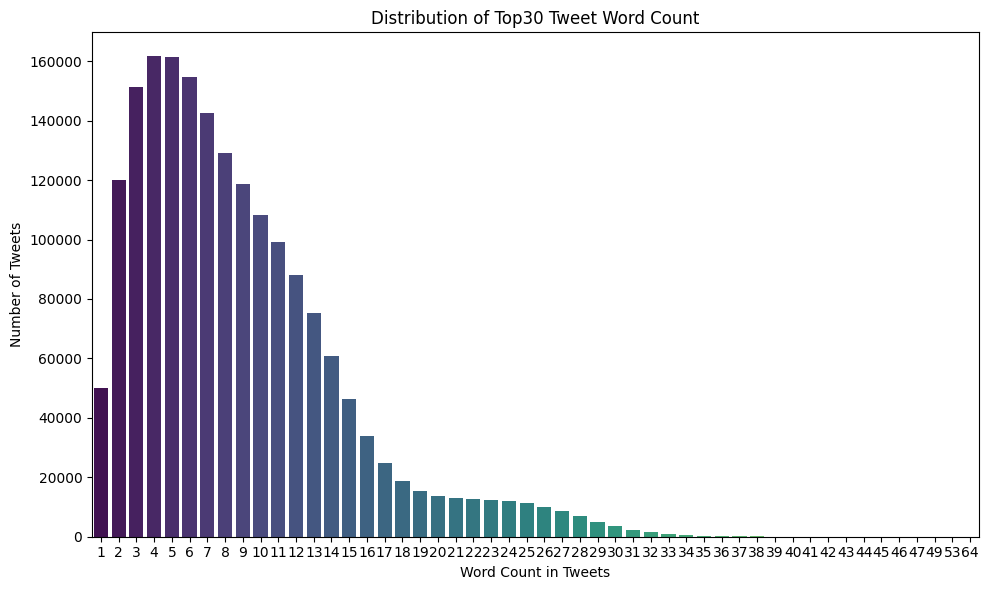

In [ ]:
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
# Add a new column for word count in each tweet
word_count =combined_df['text'].astype(str).apply(lambda x: len(x.split()))

word_count_freq = Counter(word_count)
common_word_count = word_count_freq.most_common(50)
print(common_word_count)
common_word_count.sort(key=lambda x: x[0])
label=[l  for l , _ in common_word_count]
count=[c  for _ , c in common_word_count]


plt.figure(figsize=(10, 6))
sns.barplot(x=label, y=count, palette="viridis")
plt.title('Distribution of Top30 Tweet Word Count')
plt.xlabel('Word Count in Tweets')
plt.ylabel('Number of Tweets')
plt.tight_layout()
plt.show()

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
combined_df['wordcount'].describe()

,wordcount
count,1875507.00
mean,8.74
std,5.84
min,1.00
25%,4.00
50%,7.00
75%,12.00
max,68.00


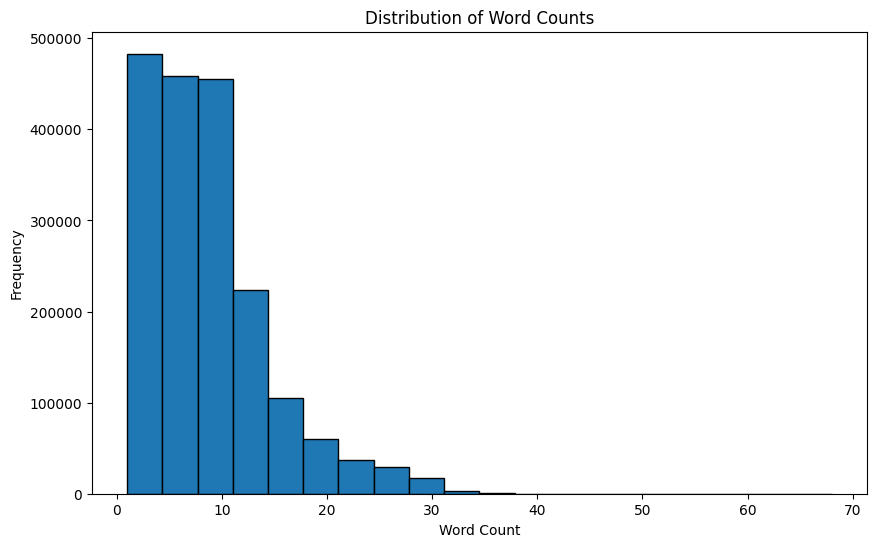

In [ ]:
import matplotlib.pyplot as plt

# Assuming df contains the wordcount column after filtering
plt.figure(figsize=(10, 6))
plt.hist(combined_df['wordcount'], bins=20, edgecolor='black')
plt.title('Distribution of Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

## Limiting word count to 50

In [ ]:
df=combined_df[combined_df['wordcount'] <= 50]
df.shape, combined_df.shape

((1875504, 3), (1875507, 3))

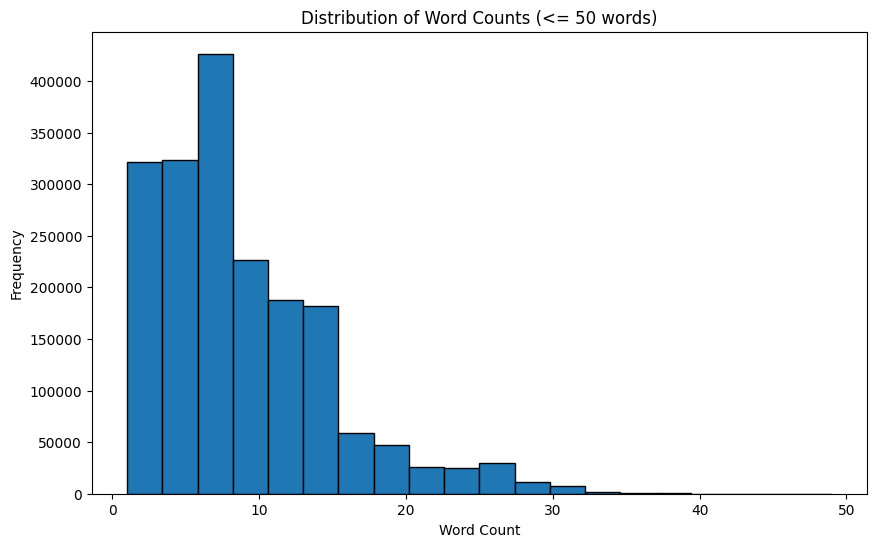

In [ ]:
import matplotlib.pyplot as plt

# Assuming df contains the wordcount column after filtering
plt.figure(figsize=(10, 6))
plt.hist(df['wordcount'], bins=20, edgecolor='black')
plt.title('Distribution of Word Counts (<= 50 words)')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


## Plotting label distribution

In [ ]:
label_distribution = df['label'].value_counts()

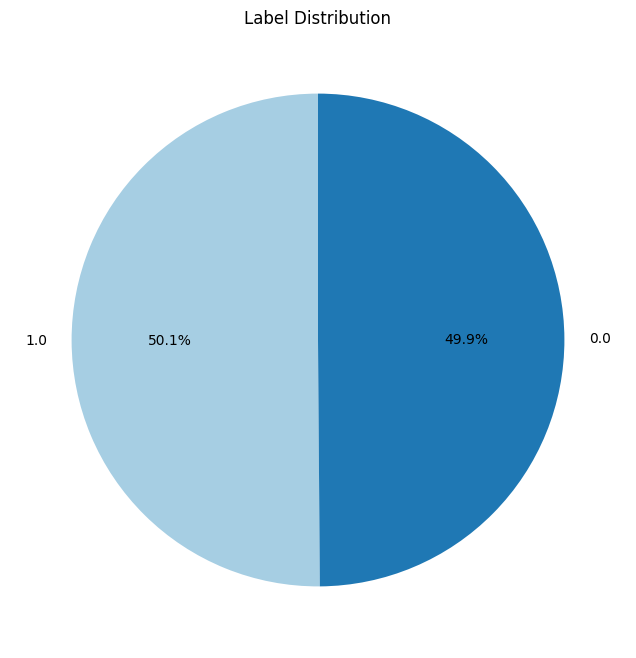

In [ ]:

plt.figure(figsize=(8, 8))  # Adjust the figure size if needed

plt.pie(label_distribution,
        labels=label_distribution.index,  # Labels for the pie sections
        autopct='%1.1f%%',                # Display percentages
        startangle=90,                    # Start angle for better orientation
        colors=plt.cm.Paired.colors)      # Optional: Use a color map

plt.title('Label Distribution')

plt.show()


In [ ]:
# Shuffle the combined dataset
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
df.drop(['wordcount'], axis=1, inplace=True)
df.head()

,text,label
0,thats unhelpful said result ive refreshed ches...,1.00
1,cedric died,0.00
2,hookah home,1.00
3,confession hate braid heart design soooooo bad...,0.00
4,please feel free bring candy pain releivers ba...,0.00


## Detecting non-ASCII characters

In [ ]:
df['text']=df['text'].astype(str)

In [ ]:
# Function to check if a text contains only ASCII characters
def is_ascii(text):
    return all(ord(char) < 128 for char in text)

# Apply the function to detect non-ASCII rows
df['is_ascii'] = df['text'].apply(is_ascii)

# Filter out non-ASCII rows
df_clean = df[df['is_ascii']]
df_dirt = df[~df['is_ascii']]

# Display the cleaned dataset
df_dirt.head()

,text,label,is_ascii
22,let drop ich hatte gerade kï½se auf toast germ...,1.00,False
112,sure said stützle okay 73ppg pretty incredible...,1.00,False
123,quotlust lovequot done posted tomorrow dat son...,1.00,False
137,gon na go shopping fosse park mate got ï½75 yeyyy,1.00,False
195,bom dia quotmanhãquot ao som de pink floydoasi...,1.00,False


In [ ]:
df_dirt.shape

(15648, 3)

In [ ]:
# Drop the 'is_ascii' column used for filtering
df_clean = df_clean.drop(columns=['is_ascii'])

# Reset index after cleaning
df_clean = df_clean.reset_index(drop=True)

# Display the cleaned dataset
df_clean.shape

(1859856, 2)

## spliting the data

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset
train_df, test_df = train_test_split(df_clean, test_size=0.2, random_state=42)

train_df.shape, test_df.shape

((1487884, 2), (371972, 2))

In [ ]:
# df_train.to_csv('train.csv',index=False)

In [ ]:
# test_df.to_csv('test.csv',index=False)

In [ ]:
X=train_df['text'].astype(str)
y=train_df['label']

X.info()

<class 'pandas.core.series.Series'>
Index: 1487884 entries, 1331388 to 121958
Series name: text
Non-Null Count    Dtype 
--------------    ----- 
1487884 non-null  object
dtypes: object(1)
memory usage: 22.7+ MB


In [ ]:
y.info()

<class 'pandas.core.series.Series'>
Index: 1487884 entries, 1331388 to 121958
Series name: label
Non-Null Count    Dtype  
--------------    -----  
1487884 non-null  float64
dtypes: float64(1)
memory usage: 22.7 MB


# Training Word2Vec model

In [ ]:
X_token=X.apply(word_tokenize)
model_w2v = Word2Vec(X_token, vector_size=50, window=5, min_count=3, workers=8, sg=0)

In [ ]:
print(model_w2v.wv.most_similar('happy'))

[('thankful', 0.6020887494087219), ('present', 0.5995129346847534), ('happiest', 0.5985146164894104), ('proud', 0.5801889300346375), ('prokops', 0.5786104798316956), ('celebrating', 0.5766767859458923), ('wonderful', 0.575870156288147), ('celebrate', 0.5702323913574219), ('celebration', 0.5677830576896667), ('bash', 0.557277500629425)]


In [ ]:
print(model_w2v.wv.most_similar('love'))

[('loved', 0.6852014064788818), ('adore', 0.6752848029136658), ('amazing', 0.6582604646682739), ('lt3', 0.6498399972915649), ('luv', 0.6086898446083069), ('loving', 0.5690470337867737), ('reminds', 0.566849410533905), ('looove', 0.5632861256599426), ('sing', 0.5577514171600342), ('awesome', 0.5556502342224121)]


In [ ]:
model_w2v.save("combined_dataset_word2vec.bin")

In [ ]:
loaded_model = Word2Vec.load("combined_dataset_word2vec.bin")

# Converting text to sequences

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

vocab_size = len(tokenizer.word_index)+1

X_train_seq = tokenizer.texts_to_sequences(X)

max_len = max(len(seq) for seq in X_train_seq)
X_train_padded = pad_sequences(X_train_seq , maxlen=max_len , padding='post')
vocab_size

427522

In [ ]:
max_len

49

In [ ]:
X_train_padded.shape

(1487884, 49)

# Creating embedding matrix

In [ ]:
embedding_dim = model_w2v.vector_size  # 300 in your case
embedding_matrix = np.zeros((vocab_size, model_w2v.vector_size))
for word, i in tokenizer.word_index.items():
    if word in model_w2v.wv:
        embedding_matrix[i] = model_w2v.wv[word]
    else:
        embedding_matrix[i] = np.random.normal(size=(embedding_dim,))

In [ ]:
embedding_matrix.shape

(427522, 50)

# saving

In [ ]:
import pickle
with open('tokenizer5.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

In [ ]:
np.save('X_train_padded.npy', X_train_padded)

In [ ]:
np.save('y.npy', y.to_numpy())

In [ ]:
np.save('embedding_matrix.npy', embedding_matrix)

In [ ]:
import os

# Get the file size in bytes
file_size = os.path.getsize('X_train_padded.npy')

# Convert to megabytes (optional)
file_size_MB = file_size / (1024 * 1024)

print(f"File size: {file_size_MB:.2f} MB")


In [ ]:
import os

# Get the file size in bytes
file_size = os.path.getsize('embedding_matrix.npy')

# Convert to megabytes (optional)
file_size_MB = file_size / (1024 * 1024)

print(f"File size: {file_size_MB:.2f} MB")

# Training models

## GRU Model

In [ ]:
model = models.Sequential([
    layers.Input(shape=(max_len,)),
    layers.Embedding(input_dim=vocab_size, output_dim=model_w2v.vector_size, weights=[embedding_matrix], trainable=True),
    layers.Bidirectional(layers.GRU(128, return_sequences=True)),
    layers.BatchNormalization(),
    layers.GlobalMaxPool1D(),
    layers.Dropout(0.4),
    layers.Dense(64, activation="relu", kernel_regularizer=l2(0.001)),
    layers.Dropout(0.4),
    layers.Dense(1, activation='sigmoid')
])

early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.compile(optimizer=Adam(learning_rate=0.0005),
               loss='binary_crossentropy',
               metrics=['accuracy',Recall(),Precision()])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 49, 50)              │      21,376,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 49, 256)             │         138,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 49, 256)             │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 256)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,531,877 (82.14 MB)

 Trainable params: 21,531,365 (82.14 MB)

 Non-trainable params: 512 (2.00 KB)

In [ ]:
history = model.fit(X_train_padded, y, epochs=100, batch_size=1024, validation_split=0.1,callbacks=[early_stopping])

Epoch 1/100
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 82s 62ms/step - accuracy: 0.8023 - loss: 0.5020 - precision: 0.8056 - recall: 0.7975 - val_accuracy: 0.8200 - val_loss: 0.4321 - val_precision: 0.8598 - val_recall: 0.7652
Epoch 2/100
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 81s 62ms/step - accuracy: 0.8270 - loss: 0.4218 - precision: 0.8304 - recall: 0.8218 - val_accuracy: 0.8327 - val_loss: 0.3824 - val_precision: 0.8171 - val_recall: 0.8580
Epoch 3/100
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 82s 62ms/step - accuracy: 0.8391 - loss: 0.3740 - precision: 0.8430 - recall: 0.8336 - val_accuracy: 0.8383 - val_loss: 0.3608 - val_precision: 0.8583 - val_recall: 0.8109
Epoch 4/100
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 82s 62ms/step - accuracy: 0.8486 - loss: 0.3476 - precision: 0.8540 - recall: 0.8420 - val_accuracy: 0.8422 - val_loss: 0.3564 - val_precision: 0.8507 - val_recall: 0.8308
Epoch 5/100
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 82s 63ms/step - accuracy: 0.8565 - loss: 0.3302 - precision: 0.8624 - recall: 0.8489 - val_accura

<Axes: >

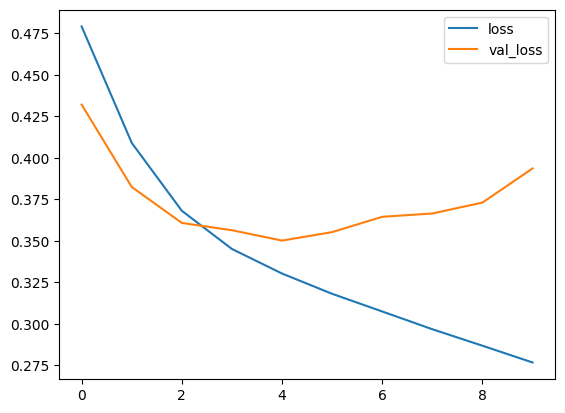

In [ ]:
df_hist=pd.DataFrame(history.history)
df_hist[['loss','val_loss']].plot()

<Axes: >

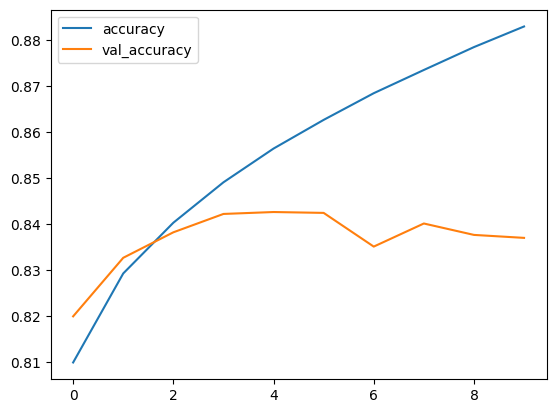

In [ ]:
df_hist[['accuracy','val_accuracy']].plot()

In [ ]:
model.save("GRU_Model.keras")

# Testing function

In [ ]:
def Predict(X,y,model):
  X_seq=tokenizer.texts_to_sequences(X.tolist())
  X_padded=pad_sequences(X_seq,maxlen=max_len,padding='post')

  y_pred = model.predict(X_padded)
  return y_pred

def myscore(X,y,model,tokenizer=tokenizer,maxlen=54):
  X_seq=tokenizer.texts_to_sequences(X.tolist())
  X_padded=pad_sequences(X_seq,maxlen=maxlen,padding='post')

  loss,acc,recall,precision=model.evaluate(X_padded,y)
  return loss,acc,recall,precision

def predict_sentiment(sentence, model , tokenizer=tokenizer, max_len=54):
    sequences = tokenizer.texts_to_sequences([sentence])
    padded_sequences = pad_sequences(sequences, maxlen=max_len)

    prediction = model.predict(padded_sequences)
    print(f"Prediction: {prediction[0][0]}")
    if prediction >= 0.5:
        return "Positive"
    else:
        return "Negative"

In [ ]:
X_test=test_df['text']
y_test=test_df['label']
List=[]

## Test model

In [ ]:
loss, acc ,recall ,precision= myscore(X_test , y_test , model=model)
List.append([loss,acc])
print(f'loss={loss},accuracy={acc*100}')

11625/11625 ━━━━━━━━━━━━━━━━━━━━ 58s 5ms/step - accuracy: 0.8415 - loss: 0.3492 - precision: 0.8409 - recall: 0.8421
loss=0.34810975193977356,accuracy=84.25930142402649


In [ ]:
predict_sentiment("i love ai", model=model) #

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step
Prediction: 0.6338116526603699


'Positive'

In [ ]:
predict_sentiment("i hate ai", model=model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction: 0.22233448922634125


'Negative'

In [ ]:
predict_sentiment("i very happy", model=model) #

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction: 0.7321387529373169


'Positive'

In [ ]:
predict_sentiment("This is the best movie I've seen in years!", model=model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Prediction: 0.9213976860046387


'Positive'

In [ ]:
predict_sentiment("I dont like this film.", model=model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Prediction: 0.3367975354194641


'Negative'

In [ ]:
predict_sentiment("I absolutely hate how slow this service is.", model=model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediction: 0.11741925030946732


'Negative'

In [ ]:
feedbacks = [
    "The product quality is amazing, I love it!",
    "I'm not satisfied with the customer support.",
    "This is the best service I've used in a while.",
    "The delivery took too long, very disappointed.",
    "The price is reasonable, but the quality could be better.",
    "Excellent experience! Will definitely recommend.",
    "Terrible customer service, will not come back.",
    "I'm neutral about the product. It's okay, not great.",
    "I absolutely hate how slow this service is.",
    "Very efficient and quick response. Highly satisfied!"
]

def predict_sentiments(feedback_list, model):
    for feedback in feedback_list:
        sentiment = predict_sentiment(feedback, model=model)
        print(f"Feedback: {feedback}\nPredicted Sentiment: {sentiment}\n")

predict_sentiments(feedbacks, model=model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Prediction: 0.8727271556854248
Feedback: The product quality is amazing, I love it!
Predicted Sentiment: Positive

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
Prediction: 0.3988470137119293
Feedback: I'm not satisfied with the customer support.
Predicted Sentiment: Negative

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
Prediction: 0.9210296273231506
Feedback: This is the best service I've used in a while.
Predicted Sentiment: Positive

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Prediction: 0.06936709582805634
Feedback: The delivery took too long, very disappointed.
Predicted Sentiment: Negative

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediction: 0.5412936806678772
Feedback: The price is reasonable, but the quality could be better.
Predicted Sentiment: Positive

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Prediction: 0.9107122421264648
Feedback: Excellent experience! Will definitely recommend.
Predicted Sentiment: Positive

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Prediction

## Classification report and confusion matrix

In [ ]:
from sklearn.metrics import classification_report

def print_classification_report(y_true, y_pred):
    y_pred_rounded = np.round(y_pred)
    report = classification_report(y_true, y_pred_rounded, target_names=['Negative', 'Positive'])
    print(report)

y_pred = Predict(X_test,y_test,model)
print_classification_report(y_test, y_pred)

11625/11625 ━━━━━━━━━━━━━━━━━━━━ 47s 4ms/step
              precision    recall  f1-score   support

    Negative       0.84      0.84      0.84    185889
    Positive       0.84      0.84      0.84    186083

    accuracy                           0.84    371972
   macro avg       0.84      0.84      0.84    371972
weighted avg       0.84      0.84      0.84    371972



In [ ]:
from sklearn.metrics import confusion_matrix

def compute_confusion_matrix(y_true, y_pred):
    y_pred_rounded = np.round(y_pred)
    cm = confusion_matrix(y_true, y_pred_rounded)
    return cm

def plot_confusion_matrix(cm, labels=['Negative', 'Positive']):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.show()


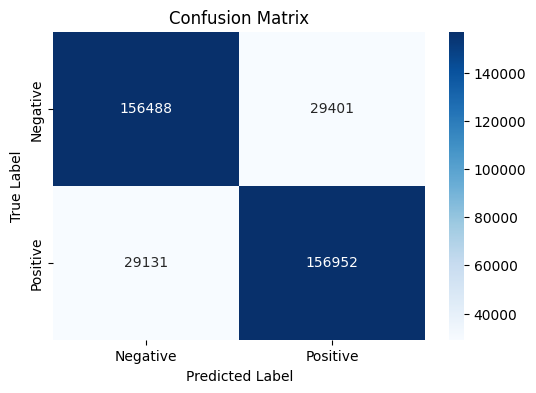

In [ ]:
cm=compute_confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

# load reviews data

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1_mJUas2HroM4t2Cx00mGbuSB_KpjEgLL' -O train.csv

--2024-10-11 13:33:24--  https://docs.google.com/uc?export=download&id=1_mJUas2HroM4t2Cx00mGbuSB_KpjEgLL
Resolving docs.google.com (docs.google.com)... 142.250.99.101, 142.250.99.113, 142.250.99.138, ...
Connecting to docs.google.com (docs.google.com)|142.250.99.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1_mJUas2HroM4t2Cx00mGbuSB_KpjEgLL&export=download [following]
--2024-10-11 13:33:24--  https://drive.usercontent.google.com/download?id=1_mJUas2HroM4t2Cx00mGbuSB_KpjEgLL&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.99.132, 2607:f8b0:400e:c09::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.99.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40954546 (39M) [application/octet-stream]
Saving to: ‘train.csv’

train.csv           100%[===================>]  39.06M  91.2MB/s    in 0.4

In [ ]:
df_train = pd.read_csv('train.csv')

In [ ]:
df_train.head()

,Unnamed: 0,processed_review,label
0,0,spectacular horror movie give chill get settle...,1
1,1,one level film bring child u want build sandca...,1
2,2,think many film especially comedy added memora...,1
3,3,first came work meysels brother much criticize...,1
4,4,advent imdb overlooked movie find interested a...,1


In [ ]:
X_test2=df_train['processed_review'].astype(str)
y_test2=df_train['label']

X_test.info()

<class 'pandas.core.series.Series'>
Index: 371972 entries, 1815243 to 66720
Series name: text
Non-Null Count   Dtype 
--------------   ----- 
371972 non-null  object
dtypes: object(1)
memory usage: 5.7+ MB


# Testing in reviews film dataset

In [ ]:
loss, acc ,recall ,precision= myscore(X_test2 , y_test2 , model=model)
print(f'loss={loss},accuracy={acc*100}')

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6832 - loss: 0.8272 - precision: 0.8178 - recall: 0.7008
loss=0.8635173439979553,accuracy=67.24600195884705


In [ ]:
y_pred2 = Predict(X_test2,y_test2,model)
print_classification_report(y_test2, y_pred2)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step
              precision    recall  f1-score   support

    Negative       0.69      0.64      0.66     25000
    Positive       0.66      0.71      0.68     25000

    accuracy                           0.67     50000
   macro avg       0.67      0.67      0.67     50000
weighted avg       0.67      0.67      0.67     50000



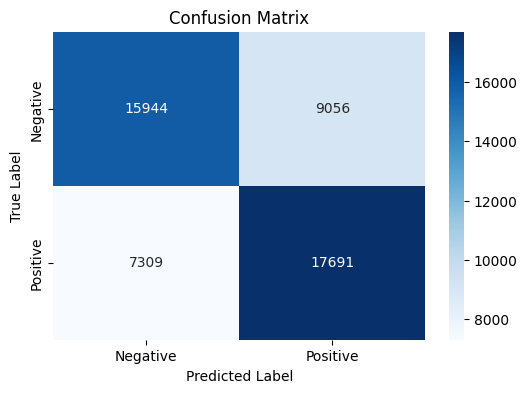

In [ ]:
cm2=compute_confusion_matrix(y_test2, y_pred2)
plot_confusion_matrix(cm2)